### Simulate Spatial System

In [3]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [15]:
def simulate_X(neighbor, num_points1, num_points2):
    np.random.seed(26)
    locations1 = np.random.rand(num_points1, 2) * 100
    locations2 = np.random.rand(num_points2, 2) * 100

    s1 = np.random.normal(50, 10, num_points1)
    # s2 = np.ones(num_points2) 
    s2 = np.random.normal(100, 50, num_points2)
    

    nbrs = NearestNeighbors(n_neighbors=neighbor).fit(locations2)
    distances, indices = nbrs.kneighbors(locations1)

    smoothed_s2 = np.zeros(num_points1)

    for i, neighbors in enumerate(indices):
        weights = np.exp(-distances[i] / np.max(distances[i]))
        smoothed_s2[i] = np.sum(s2[neighbors] * weights) / np.sum(weights)
    return smoothed_s2, locations1

X, loc1 = simulate_X(10, 100, 150) # use a neighbor of 10. Would see if model can recover this too. 

In [5]:
print(len(X))

100


In [6]:
print(X[:5])

[123.52798085 105.10624026  83.62942435 133.86956433  79.60390359]


In [7]:
def create_surface(locations, sigma):
    """Function to create spatially varying surface with a gradient pattern increasing linearly from 
        bottom left to the top right
    """
    x = locations[:, 0]
    y = locations[:, 1]

    B = x + y

    B_smoothed = gaussian_filter(B, sigma)
    return B_smoothed

b1 = create_surface(loc1, 3)

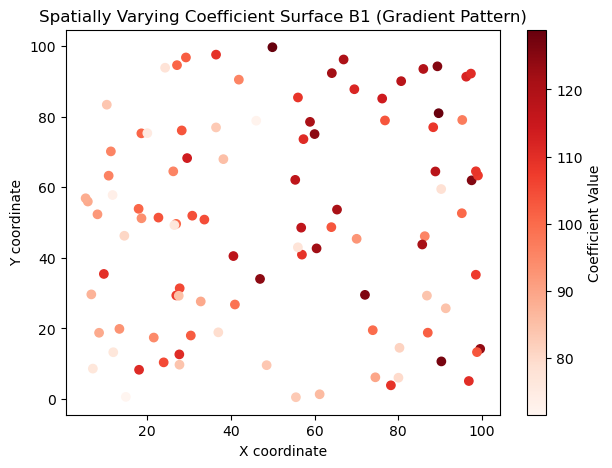

In [12]:
plt.figure(figsize=(7, 5))
plt.scatter(loc1[:, 0], loc1[:, 1], c=b1, cmap='Reds')
plt.colorbar(label='Coefficient Value')
plt.title('Spatially Varying Coefficient Surface b1 (Gradient Pattern)')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()

#### Generate y 

In [13]:
y = np.multiply(b1, X)

In [16]:
# y 

In [17]:
np.mean(b1)

100.96305034632003